In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bikes = pd.read_csv("day.csv")
print(bikes.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [58]:
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
print(bikes.shape)


(730, 16)


In [60]:
#Checking for the count of null values in the columns
count=df.isnull().sum()
print(count)

yr              0
holiday         0
workingday      0
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
season_2        0
season_3        0
season_4        0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth_6          0
mnth_7          0
mnth_8          0
mnth_9          0
mnth_10         0
mnth_11         0
mnth_12         0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
weathersit_2    0
weathersit_3    0
dtype: int64


In [61]:
## There are no null values. Now we can go ahead and drop some coulmns which are not relevant for modelling
# dteday - Since the same data is available as yr and mnth, this column becomes redundant we can drop it
#instant is index column which does not add any value to the model
bikes = bikes.drop(['dteday','instant'], axis=1)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [62]:
bikes.describe()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Out of 14 columns we have the below types 
Categorical : season, mnth, holiday,weekday,workinday,weathersit,yr
Numeric : temp, atemp, hum, windspeed, casual, registered
Predicting : cnt

Reasoning: 
1. Eventhough season, mnth, holiday, weekday, workingday and weathersit has numerical values, sematically these are categorical data.
2. yr is semanticaly numerical. But in our current model, as mentioned in the data dictionary we have only two possible values 2018/2019 so we can consider it as categorical



<Axes: xlabel='yr', ylabel='cnt'>

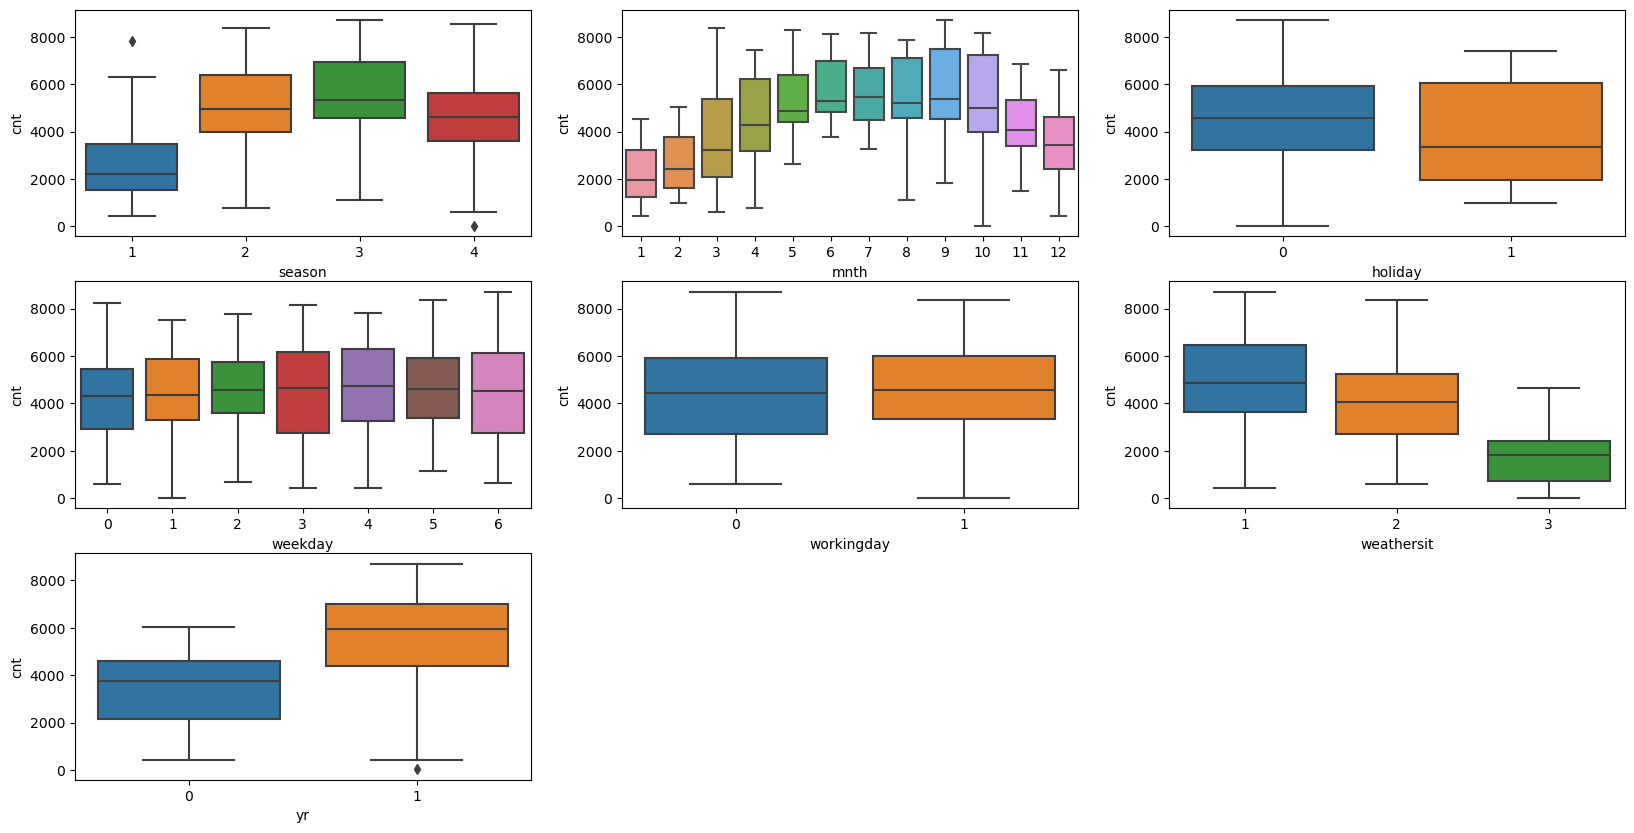

In [63]:
#Lets check categorical vraibles using box plots
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=bikes)

In [64]:
#Insights



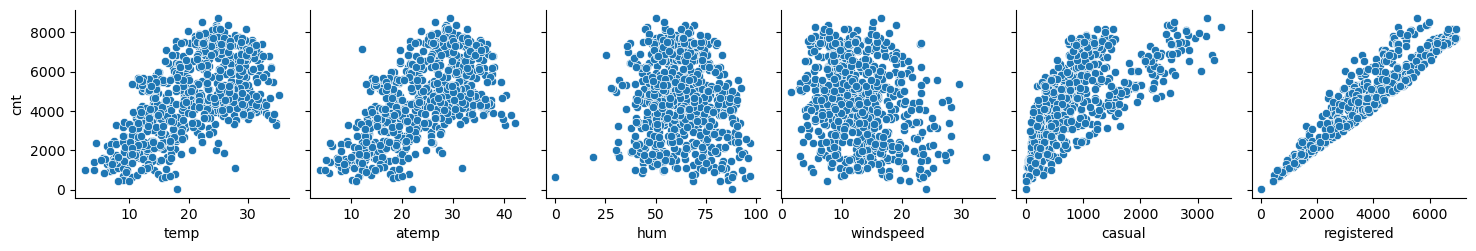

In [65]:

#lets plot pairplots to see the relation between numerical varibles


sns.pairplot(data=bikes, x_vars=['temp' , 'atemp','hum','windspeed','casual','registered'], y_vars= 'cnt')



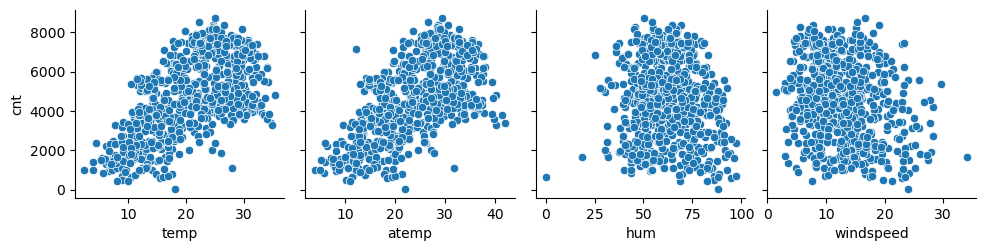

In [66]:
##Not concidering casual and registered because they represent the same value as cnt 

df = bikes.drop(['casual','registered'], axis=1)
sns.pairplot(data=bikes, x_vars=['temp' , 'atemp','hum','windspeed'], y_vars= 'cnt')


<Axes: >

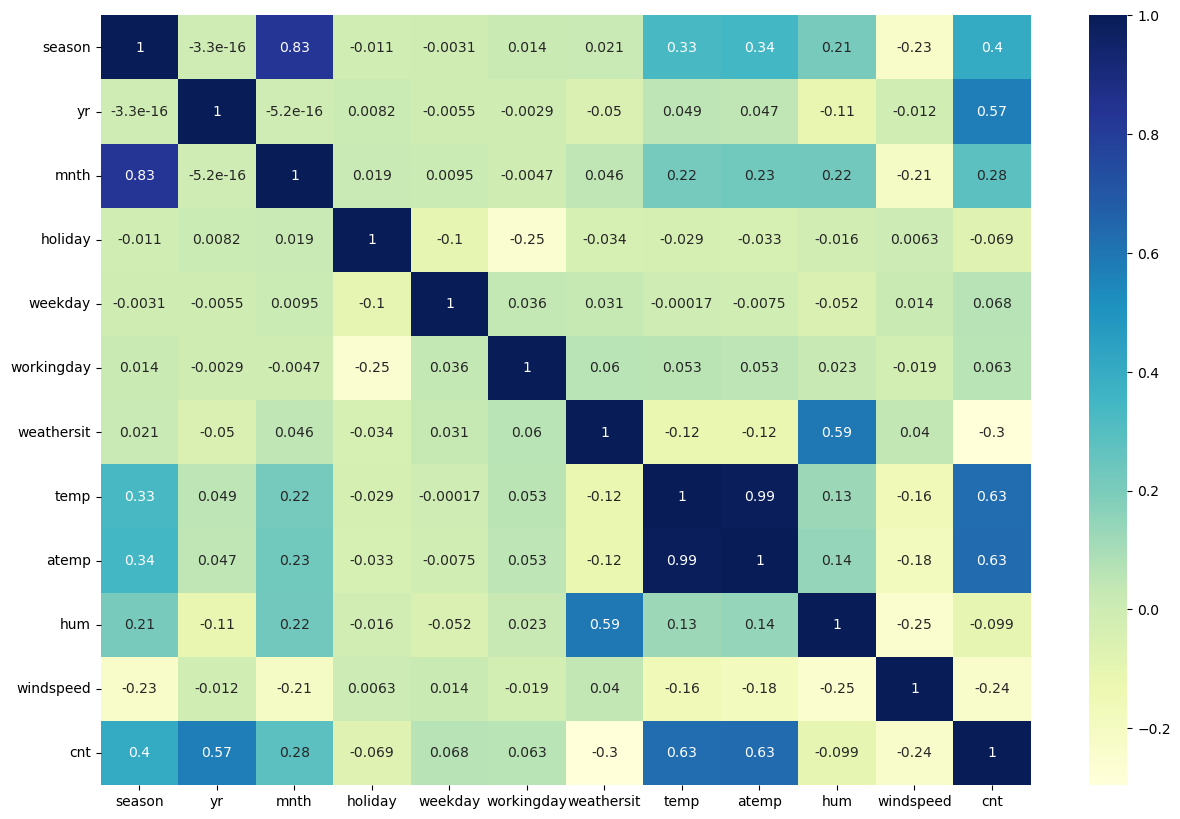

In [67]:
#From first look , tmp and atmp looks correlated to cnt but to get a clear picture lets look at heatmap



plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")


In [68]:
# From the above , yr, temp and atemp looks highly correlated to tmp.


In [69]:
# Creating dummies for categorical varibles 
# Holiday, working day and yr already has binary values 
#Creating dummies for Season, mnth, weathersit, weekday 

# Changing the type for categorical variables before creating dummies


df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')

df['weekday']=df['weekday'].astype('category')
df['mnth']=df['mnth'].astype('category')
print(df.info())

df = pd.get_dummies(df, drop_first=True)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1  

In [70]:
## Now, lets split the data to test and train set 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_train, df_test = train_test_split(df, train_size = 0.65, test_size = 0.35, random_state = 100)
lm = LinearRegression()
df_test.shape


(256, 30)

In [71]:
#Scaling Numeric vairble using fit_transform from sklearn so that it compresses all values within 0 -1 range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars =['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
402,1,0,1,0.367630,0.370208,0.511378,0.225890,0.500805,0,0,...,0,0,0,1,0,0,0,0,0,0
590,1,0,1,0.831783,0.784574,0.707600,0.272711,0.777957,0,1,...,0,0,0,1,0,0,0,0,0,0
609,1,0,0,0.794402,0.748111,0.839845,0.046794,0.665900,0,1,...,0,0,0,0,0,0,0,0,1,0
704,1,0,1,0.245101,0.235138,0.524259,0.284741,0.615854,0,0,...,0,1,0,0,0,1,0,0,0,0
376,1,0,1,0.402934,0.397556,0.827394,0.298098,0.468822,0,0,...,0,0,0,0,0,1,0,0,1,0


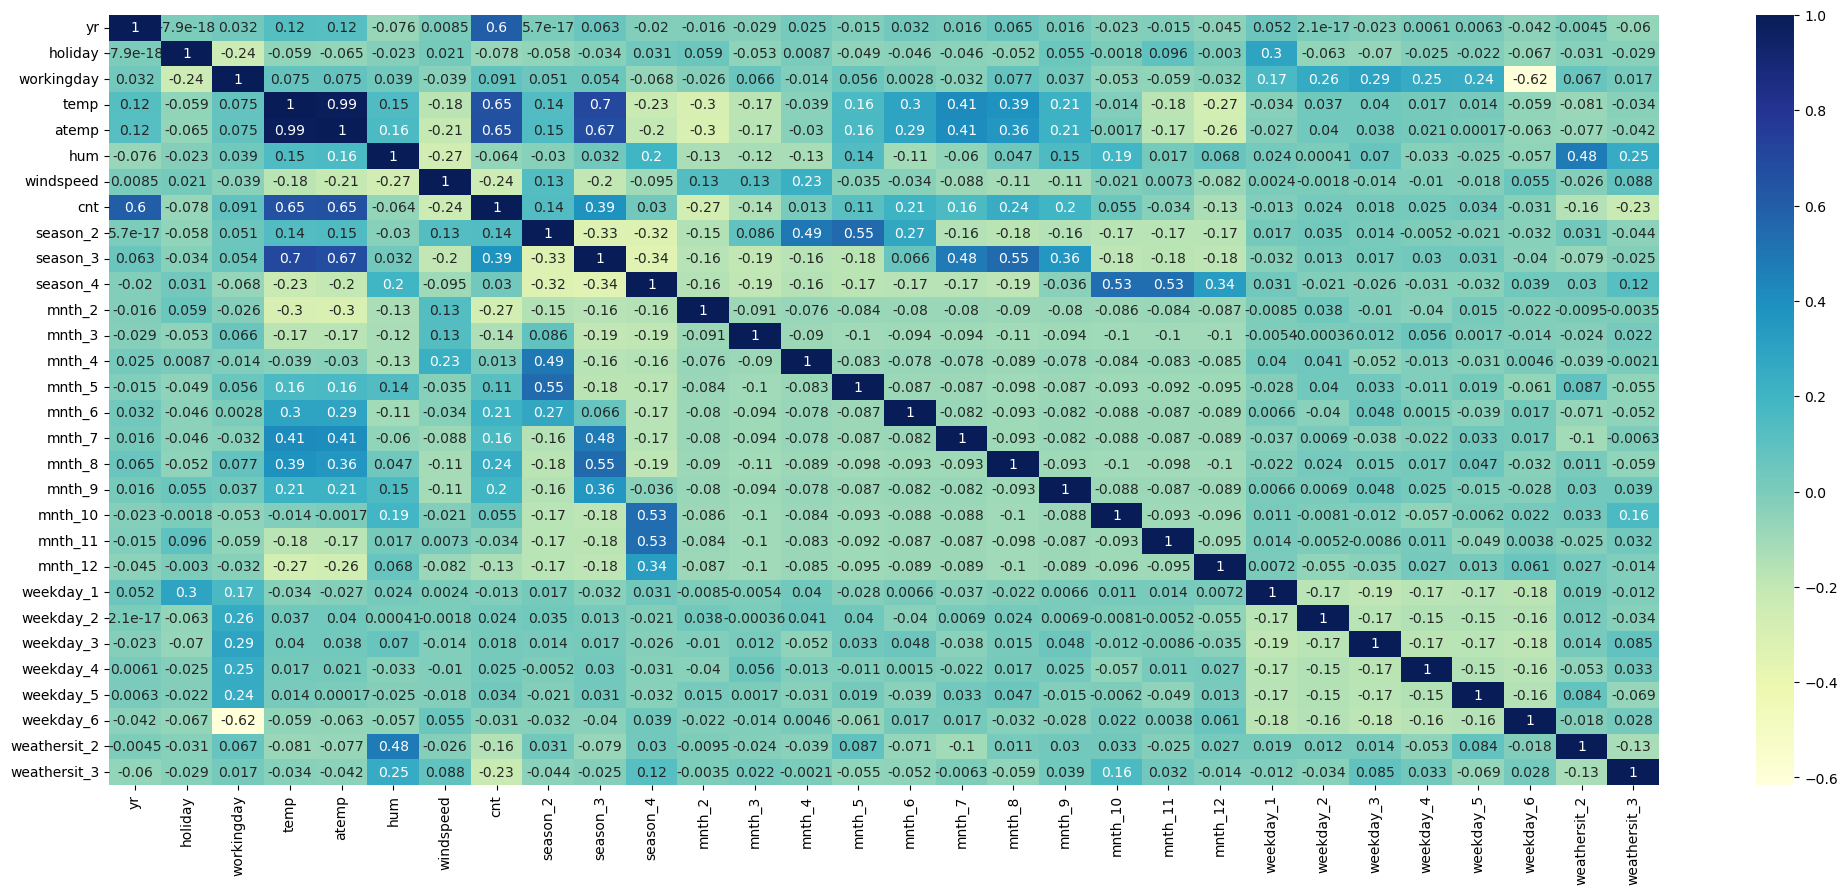

In [72]:
# Plot the heatmap to understand the correaltion between differnt predictor variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,10)) 
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [73]:
# Create X_train : all predictor variables and y_train : varible being predicted which is cnt
y_train = df_train.pop('cnt')
X_train = df_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 402 to 520
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            474 non-null    int64  
 1   holiday       474 non-null    int64  
 2   workingday    474 non-null    int64  
 3   temp          474 non-null    float64
 4   atemp         474 non-null    float64
 5   hum           474 non-null    float64
 6   windspeed     474 non-null    float64
 7   season_2      474 non-null    uint8  
 8   season_3      474 non-null    uint8  
 9   season_4      474 non-null    uint8  
 10  mnth_2        474 non-null    uint8  
 11  mnth_3        474 non-null    uint8  
 12  mnth_4        474 non-null    uint8  
 13  mnth_5        474 non-null    uint8  
 14  mnth_6        474 non-null    uint8  
 15  mnth_7        474 non-null    uint8  
 16  mnth_8        474 non-null    uint8  
 17  mnth_9        474 non-null    uint8  
 18  mnth_10       474 non-null  

In [74]:
#Now since we have huge number of columns, lets build the model using Recursive feature elimination
# Lets run RFE on our data set to do automatic elimination of features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 18),
 ('mnth_3', False, 7),
 ('mnth_4', False, 19),
 ('mnth_5', False, 10),
 ('mnth_6', False, 15),
 ('mnth_7', True, 1),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', False, 6),
 ('mnth_11', False, 17),
 ('mnth_12', False, 20),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 16),
 ('weekday_5', False, 13),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [76]:
# creating a variable col with the list of columns selcted by RFE
col = X_train.columns[rfe.support_]
#RFE selected columns . We could infere from our earlier heatmap that most of the columns dropped by RFE were those which are correlated with each other hence doesnt add value to the model
col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_7', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [77]:
#Lets also take a look at columns dropped by RFE
X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [78]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_7,mnth_9,weathersit_3
402,1,0,0.367630,0.511378,0.225890,0,0,0,0,0
590,1,0,0.831783,0.707600,0.272711,0,0,0,0,0
609,1,0,0.794402,0.839845,0.046794,0,0,0,1,0
704,1,0,0.245101,0.524259,0.284741,0,1,0,0,0
376,1,0,0.402934,0.827394,0.298098,0,0,0,0,0


In [79]:
# Calculating the VIF value

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
def computevif(df):

    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

computevif(X_train_rfe)

,Features,VIF
3,hum,9.96
2,temp,9.12
4,windspeed,3.56
0,yr,2.01
5,season_2,1.74
6,season_4,1.69
7,mnth_7,1.55
8,mnth_9,1.28
9,weathersit_3,1.10
1,holiday,1.04


In [80]:
# We can infer that hum and temp has very high VIF. Lets build the statsmodel to look at the p values as well
# BUILDING MODEL USING RFE Columns
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm1).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          2.14e-175
Time:                        22:36:00   Log-Likelihood:                 464.36
No. Observations:                 474   AIC:                            -906.7
Df Residuals:                     463   BIC:                            -861.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2737      0.026     10.376      0.000       0.222       0.326
yr               0.2266      0.009     26.427      0.000       0.210       0.243
holiday         -0.0784      0.027     -2.900      0.004      -0.132      -0.025
temp             0.6175      0.023     26.814      0.000       0.572       0.663
hum             -0.2894      0.032     -8.970      0.000      -0.353      -0.226
windspeed       -0.2111      0.027     -7.916      0.000      -0.263      -0.159
season_2         0.0791      0.011      6.913      0.000       0.057       0.102
season_4         0.1379      0.011     12.506      0.000       0.116       0.160
mnth_7          -0.0545      0.019     -2.854      0.005      -0.092      -0.017
mnth_9           0.0865      0.017      4.972      0.000       0.052       0.121
weathersit_3    -0.1894      0.025     -7.440      0.000      -0.239      -0.139
==============================================================================
Omnibus:                       55.782   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.731
Skew:                          -0.677   Prob(JB):                     9.02e-25
Kurtosis:                       4.943   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:

#Lets drop hum due to high  high VIF
X_train_new = X_train_rfe.drop('hum',axis=1)
X_train_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 402 to 520
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            474 non-null    int64  
 1   holiday       474 non-null    int64  
 2   temp          474 non-null    float64
 3   windspeed     474 non-null    float64
 4   season_2      474 non-null    uint8  
 5   season_4      474 non-null    uint8  
 6   mnth_7        474 non-null    uint8  
 7   mnth_9        474 non-null    uint8  
 8   weathersit_3  474 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 20.8 KB


In [82]:
computevif(X_train_new)

,Features,VIF
2,temp,4.94
3,windspeed,3.01
0,yr,2.00
4,season_2,1.73
6,mnth_7,1.51
5,season_4,1.43
7,mnth_9,1.28
8,weathersit_3,1.07
1,holiday,1.03


In [83]:
# Building the model again after dropping hum column
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit() 
lm2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.59e-160
Time:                        22:36:00   Log-Likelihood:                 426.38
No. Observations:                 474   AIC:                            -832.8
Df Residuals:                     464   BIC:                            -791.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0879      0.018      4.974      0.000       0.053       0.123
yr               0.2332      0.009     25.225      0.000       0.215       0.251
holiday         -0.0750      0.029     -2.562      0.011      -0.132      -0.017
temp             0.5829      0.025     23.723      0.000       0.535       0.631
windspeed       -0.1505      0.028     -5.391      0.000      -0.205      -0.096
season_2         0.0751      0.012      6.070      0.000       0.051       0.099
season_4         0.1200      0.012     10.228      0.000       0.097       0.143
mnth_7          -0.0363      0.021     -1.768      0.078      -0.077       0.004
mnth_9           0.0738      0.019      3.931      0.000       0.037       0.111
weathersit_3    -0.2505      0.027     -9.436      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       59.618   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.491
Skew:                          -0.746   Prob(JB):                     1.68e-24
Kurtosis:                       4.821   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Dropping mnth_7 as it has high p value
X_train_new = X_train_new.drop('mnth_7',axis=1)
X_train_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 402 to 520
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            474 non-null    int64  
 1   holiday       474 non-null    int64  
 2   temp          474 non-null    float64
 3   windspeed     474 non-null    float64
 4   season_2      474 non-null    uint8  
 5   season_4      474 non-null    uint8  
 6   mnth_9        474 non-null    uint8  
 7   weathersit_3  474 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 20.4 KB


In [85]:
computevif(X_train_new)

,Features,VIF
2,temp,3.60
3,windspeed,2.97
0,yr,1.99
4,season_2,1.54
5,season_4,1.34
6,mnth_9,1.19
7,weathersit_3,1.07
1,holiday,1.03


In [86]:
# Building model 3
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          4.65e-161
Time:                        22:36:00   Log-Likelihood:                 424.79
No. Observations:                 474   AIC:                            -831.6
Df Residuals:                     465   BIC:                            -794.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0920      0.018      5.237      0.000       0.057       0.127
yr               0.2340      0.009     25.282      0.000       0.216       0.252
holiday         -0.0739      0.029     -2.521      0.012      -0.132      -0.016
temp             0.5630      0.022     25.732      0.000       0.520       0.606
windspeed       -0.1501      0.028     -5.365      0.000      -0.205      -0.095
season_2         0.0823      0.012      7.018      0.000       0.059       0.105
season_4         0.1238      0.012     10.708      0.000       0.101       0.147
mnth_9           0.0825      0.018      4.545      0.000       0.047       0.118
weathersit_3    -0.2517      0.027     -9.466      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       61.326   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.755
Skew:                          -0.765   Prob(JB):                     3.28e-25
Kurtosis:                       4.836   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:

#Removing holiday as it has high p value
X_train_new = X_train_new.drop('holiday',axis=1)
X_train_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 402 to 520
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            474 non-null    int64  
 1   temp          474 non-null    float64
 2   windspeed     474 non-null    float64
 3   season_2      474 non-null    uint8  
 4   season_4      474 non-null    uint8  
 5   mnth_9        474 non-null    uint8  
 6   weathersit_3  474 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 16.7 KB


In [88]:
computevif(X_train_new)

,Features,VIF
1,temp,3.60
2,windspeed,2.95
0,yr,1.99
3,season_2,1.54
4,season_4,1.34
5,mnth_9,1.19
6,weathersit_3,1.07


In [89]:
# Building model 4
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit() 
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     274.7
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          6.29e-161
Time:                        22:36:00   Log-Likelihood:                 421.58
No. Observations:                 474   AIC:                            -827.2
Df Residuals:                     466   BIC:                            -793.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0891      0.018      5.053      0.000       0.054       0.124
yr               0.2339      0.009     25.128      0.000       0.216       0.252
temp             0.5661      0.022     25.772      0.000       0.523       0.609
windspeed       -0.1520      0.028     -5.403      0.000      -0.207      -0.097
season_2         0.0834      0.012      7.075      0.000       0.060       0.107
season_4         0.1234      0.012     10.615      0.000       0.101       0.146
mnth_9           0.0796      0.018      4.367      0.000       0.044       0.115
weathersit_3    -0.2491      0.027     -9.321      0.000      -0.302      -0.197
==============================================================================
Omnibus:                       62.913   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.425
Skew:                          -0.773   Prob(JB):                     1.92e-26
Kurtosis:                       4.899   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#This model seems good as p values shows very low multicollinearity adn all of the p values are significant



X_train_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 402 to 520
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         474 non-null    float64
 1   yr            474 non-null    int64  
 2   temp          474 non-null    float64
 3   windspeed     474 non-null    float64
 4   season_2      474 non-null    uint8  
 5   season_4      474 non-null    uint8  
 6   mnth_9        474 non-null    uint8  
 7   weathersit_3  474 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 20.4 KB


In [91]:
# Generating predicted values of y for the train set

y_train_pred = lm4.predict(X_train_lm4)

In [92]:
y_train_pred

402    0.496809
590    0.752456
609    0.845189
704    0.541927
376    0.505821
         ...   
578    0.783684
53     0.186882
350    0.287423
79     0.353856
520    0.691525
Length: 474, dtype: float64

C:\Users\kosala.priya.c.r@sap.com\AppData\Local\Temp\ipykernel_21488\2192423072.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((residual), bins = 20)


Text(0.5, 0, 'Errors')

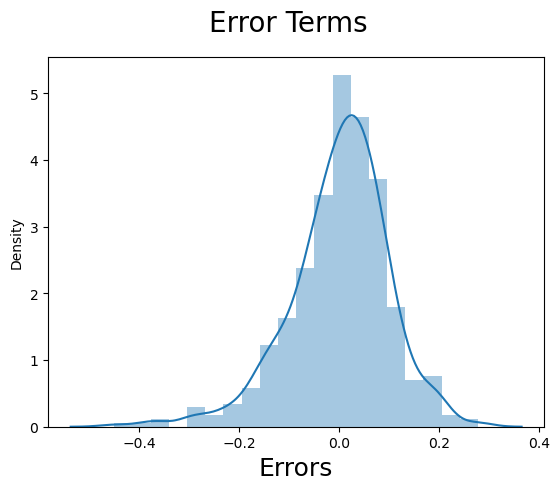

In [93]:
###CHECKING ASSUMPTIONS OF LR 
## 1. Error terms are normal distributed

# Plot the histogram of the error terms
residual = y_train-y_train_pred
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'Residuals')

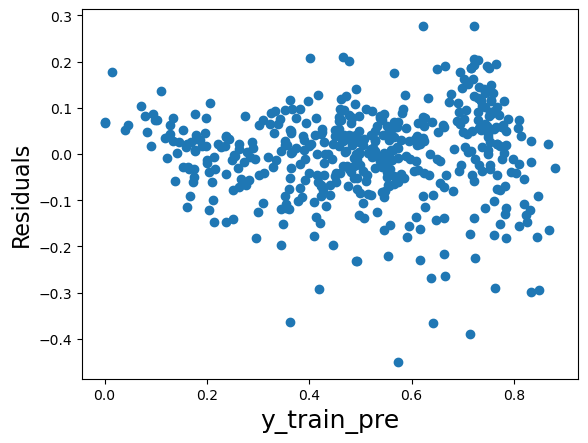

In [37]:
#From the above histogram we can clearly see that the errors are normally distributed.

# 2.  Homoscedasticity
fig = plt.figure()
plt.scatter(y_train_pred, residual)

#fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pre', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)      

In [94]:
# 3 . Linear relationship between varibles
########################333sns.pairplot(data=X_train_lm4, x_vars=['yr' , 'temp','season_2','windspeed','season_4','mnth_9','weathersit_3'], y_vars= y_train)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000215ECCFE680> (for post_execute):


ValueError: Image size of 1750x118500 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1750x118500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1750x118500 with 3318 Axes>

In [39]:
#3. Errors are independent 

#plt.figure(figsize=(10,5))
#p = sns.lineplot(data=(y_train_pred,residual),marker='o',color='blue')
#plt.xlabel('y_train_pred')
#plt.ylabel('Residuals')

#p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [95]:

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     274.7
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          6.29e-161
Time:                        22:43:15   Log-Likelihood:                 421.58
No. Observations:                 474   AIC:                            -827.2
Df Residuals:                     466   BIC:                            -793.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0891      0.018      5.053   

We can see that the demand for bikes dependa mainly on the below varibles:

year, temp, windspeed, season_2, season_4, mnth_9 and weathersit_3

In [96]:
# MAKING PREDICTIONS USING TEST DATA
# SCALING Numeric variables of test data. here we apply only transform as we are going to predict using the scalars already obtained
num_vars =['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
df_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.00000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.500000,0.035156,0.671875,0.563525,0.537569,0.640462,0.311053,0.532096,0.28125,0.253906,...,0.078125,0.078125,0.117188,0.164062,0.105469,0.152344,0.167969,0.140625,0.332031,0.023438
std,0.500979,0.184535,0.470450,0.226915,0.211724,0.145028,0.158722,0.217362,0.45049,0.436097,...,0.268894,0.268894,0.322274,0.371058,0.307758,0.360058,0.374571,0.348315,0.471865,0.151585
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363950,0.359638,0.534027,0.197860,0.389180,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.562325,0.552104,0.636045,0.296776,0.528877,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.741090,0.398703,0.692706,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.981707,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
#Dividing the data to X and Y sets
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 184 to 327
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            256 non-null    int64  
 1   holiday       256 non-null    int64  
 2   workingday    256 non-null    int64  
 3   temp          256 non-null    float64
 4   atemp         256 non-null    float64
 5   hum           256 non-null    float64
 6   windspeed     256 non-null    float64
 7   season_2      256 non-null    uint8  
 8   season_3      256 non-null    uint8  
 9   season_4      256 non-null    uint8  
 10  mnth_2        256 non-null    uint8  
 11  mnth_3        256 non-null    uint8  
 12  mnth_4        256 non-null    uint8  
 13  mnth_5        256 non-null    uint8  
 14  mnth_6        256 non-null    uint8  
 15  mnth_7        256 non-null    uint8  
 16  mnth_8        256 non-null    uint8  
 17  mnth_9        256 non-null    uint8  
 18  mnth_10       256 non-null  

In [100]:
#Selecting the variables that were part of final model lm4
col1=X_train_new.columns
X_test=X_test[col1]
X_test

,yr,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
184,0,0.831783,0.084219,0,0,0,0
535,1,0.901354,0.153728,1,0,0,0
299,0,0.511964,0.334206,0,1,0,0
221,0,0.881625,0.339570,0,0,0,0
152,0,0.817246,0.537414,1,0,0,0
...,...,...,...,...,...,...,...
447,1,0.552460,0.323500,1,0,0,0
259,0,0.538962,0.316818,0,0,1,0
174,0,0.828668,0.386364,0,0,0,0
267,0,0.716524,0.017360,0,1,1,0


In [101]:
# adding constant as statsmodel doesnt cover that
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 184 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         256 non-null    float64
 1   yr            256 non-null    int64  
 2   temp          256 non-null    float64
 3   windspeed     256 non-null    float64
 4   season_2      256 non-null    uint8  
 5   season_4      256 non-null    uint8  
 6   mnth_9        256 non-null    uint8  
 7   weathersit_3  256 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 11.0 KB


In [104]:
# Making predictions using final model
y_pred = lm4.predict(X_test_lm6)
y_pred

184    0.547188
535    0.893287
299    0.451568
221    0.536596
152    0.553444
         ...   
447    0.669972
259    0.425627
174    0.499504
267    0.695087
327    0.393331
Length: 256, dtype: float64

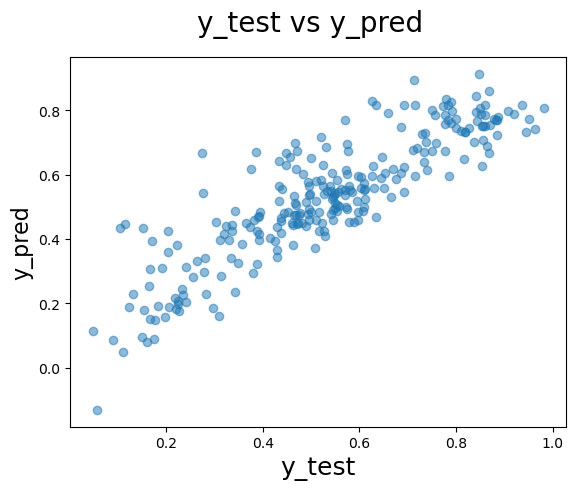

In [105]:
# Plotting y_test and y_pred to compare how the predictions are

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [106]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     274.7
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          6.29e-161
Time:                        22:55:14   Log-Likelihood:                 421.58
No. Observations:                 474   AIC:                            -827.2
Df Residuals:                     466   BIC:                            -793.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0891      0.018      5.053   

### Final Observations:
temp, yr, weathersit_3 and windspeed are the top four varibles impacting the demand for bikes

When temp increases by 1 unit demand for bikes increases by 0.5661 numbers
When yr increases by 1 unit demand for bikes increases by 0.2339 numbers
When weathersit_3 increases by 1 unit demand for bikes decreases by 0.2491 numbers
When temp increases by 1 unit demand for bikes decreases by 0.1520 numbers
